In [2]:
#Endurance - find density from upper and lower hybrid lines 

import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/Endurance/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
import end_load_data
import plasma_params_get_density_from_flhr_freq as dflh
import plasma_params_get_flhr_freq as dflh2
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/')
import plot_spectrogram as ps
from scipy import signal

import numpy as np 
import matplotlib.pyplot as plt
import plasmapy
from astropy import units as u  

#%load_ext nb_black
plt.rcParams['figure.figsize'] = [10, 4]

"""Enable auto module reloading"""
#%load_ext autoreload
#%autoreload 2


"""Load mag data"""
mag = end_load_data.mag_dc()


"""Load E-field VLF data"""
evlf = end_load_data.efield_vlf()


"""Load E-field HF data"""
ehf = end_load_data.efield_hf()





/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/plot_spectrogram.py:25: RuntimeWarning: divide by zero encountered in log10
  pn = 10.*np.log10(p)


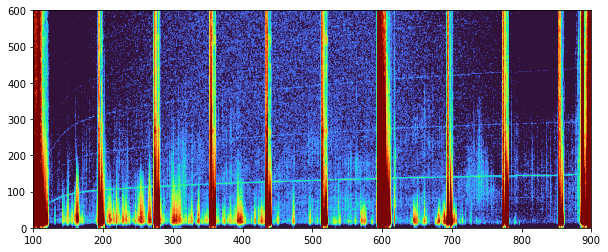

array([[-2.56840153e+01, -3.27140579e+01, -1.27696095e+01, ...,
        -1.12375145e+02, -1.14270172e+02, -1.77646393e+02],
       [ 4.05738640e+00, -6.84521151e+00, -1.86027408e-01, ...,
        -9.62191467e+01, -9.38495636e+01, -1.91889572e+02],
       [ 2.50807953e+00, -2.74969125e+00, -6.72186327e+00, ...,
        -9.45710831e+01, -9.71329117e+01, -1.92961670e+02],
       ...,
       [-3.65242882e+01, -3.99078217e+01, -4.35249634e+01, ...,
        -9.76963425e+01, -9.51384888e+01, -3.36032379e+02],
       [-4.04822693e+01, -3.43185081e+01, -4.31519356e+01, ...,
        -9.46656723e+01, -9.74427643e+01, -3.36032440e+02],
       [-5.72409821e+01, -5.33333130e+01, -3.75973854e+01, ...,
        -1.07678291e+02, -1.02038155e+02,            -inf]], dtype=float32)

In [3]:
#Plot VLF spectra with overplotted ion cyclotron harmonic lines 


fs = evlf.samplerate
freq12, tspec12, power12 = signal.spectrogram(evlf.dvlf12_mvm, fs, nperseg=16384, noverlap=16384/2., return_onesided=True)


#Left cyclotron waves
#ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-28], xr=[100,300],yr=[4000,9000],pl=1)

#Right cyclotron waves
#ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-45], xr=[700,900],yr=[4000,9000],pl=1)

#central cyclotron waves
#ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-65], xr=[100,800],yr=[2000,9000],pl=1)


#Plot low freqs to find non-contaminated times 
ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-40], xr=[100,900],yr=[0,600],pl=1,yscale='linear')


#ps.plot_spectrogram(tspec12,freq12,power12,vr=vr[-80,-40], xr=[100,900],yr=[5000,9000],pl=1,yscale='linear')



#ps.plot_spectrogram(tspec12,freq12,power12,vr=vr[-80,-40], xr=[100,900],yr=[5000,9000],pl=1,yscale='linear')






In [4]:
#Plot HF spectra with overplotted fce

%matplotlib tk


hf12 = ehf.afftpow12
#hf34 = ehf.afftpow34
hffreqs = ehf.afreq
hftimes = ehf.atimesfft


Bo = signal.decimate(mag.Bmag, 10)
tvals = signal.decimate(mag.tsec,10)
fcet = [28*i for i in Bo]



vr = [-28,-25]
yr = [2e3, 2.6e6]
xr = [100,900]

fig, axs = plt.subplots()

axs.plot(tmag, fcet)
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])


im = axs.imshow(hf12,vmin=vr[0],vmax=vr[1],cmap='turbo',aspect='auto', extent=[np.min(hftimes),np.max(hftimes),np.min(hffreqs),np.max(hffreqs)], origin='lower')
#Force x,y axes to be defined exactly based on the range of data.
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

plt.yscale('linear')
plt.xlim([xr[0],xr[1]])
plt.ylim([yr[0],yr[1]])
plt.show()


In [ ]:
#Estimate density from lower hybrid line. Need to do this first b/c I'm not sure which line to select for upper hybrid. 

###RESULT: THIS IS GIVING ME VALUES THAT DON'T LINE UP TO THE UPPER HYBRID NOISE. MOST OF THE UH AND FPE FREQS ARE TOO HIGH.

#fs = evlf.samplerate
#freq12, tspec12, power12 = signal.spectrogram(evlf.dvlf12_mvm, fs, nperseg=16384, noverlap=16384/2., return_onesided=True)
#ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-60], xr=[300,500],yr=[4000,10000],pl=1)




#flh identification 
tlh = [117,139,167,206,264,335,420,479,574,666,759,817,850,868,879]
flh = [7538,8241,7882,7338,6956,6613,6476,6438,6632,6997,7426,7858,7515,5733,4711] #* u.Hz

print(range(len(tlh)))

fce = []
Bo = []
for i in range(len(tlh)):
    goo = np.squeeze(np.where(mag.tsec > tlh[i]))
    fce.append(28.*mag.Bmag[goo[0]])
    Bo.append(mag.Bmag[goo[0]])




flh = flh * u.Hz 
fce = fce * u.Hz 
Bo = Bo * u.nT


"""
TESTING
"""
flh = flh/1.3
for i in range(len(tlh)): print(tlh[i], flh[i], flh[i]*1.3)



nH_ne = np.full(len(tlh),0.5) * u.dimensionless_unscaled 
nO_ne = np.full(len(tlh),0.5) * u.dimensionless_unscaled 


ne1 = dflh.dens_IonMassFractions(flh, fce, nH_ne, nO_ne)
ne2 = dflh.dens_singleion(flh, Bo, 'H+')
ne3 = dflh.dens_singleion(flh, Bo, 'O+')

print(ne1, ne2, ne3)

ne1 = [i.value for i in ne1]
ne2 = [i.value for i in ne2]
ne3 = [i.value for i in ne3]

fpe1 = [8980*np.sqrt(i) for i in ne1]
fpe2 = [8980*np.sqrt(i) for i in ne2]
fpe3 = [8980*np.sqrt(i) for i in ne3]


fce = [i.value for i in fce]


#print(fpe1[0]/1e6,fpe2[0]/1e6,fpe3[0]/1e6)


fuh1 = [np.sqrt(fpe1[i]**2 + fce[i]**2) for i in range(len(fce))]
fuh2 = [np.sqrt(fpe2[i]**2 + fce[i]**2) for i in range(len(fce))]
fuh3 = [np.sqrt(fpe3[i]**2 + fce[i]**2) for i in range(len(fce))]

#fL=0 cutoff 
fL01 = [-1*(fce[i]/2) + np.sqrt(fpe1[i]**2 + (fce[i]/2.)**2) for i in range(len(fce))]
fL02 = [-1*(fce[i]/2) + np.sqrt(fpe2[i]**2 + (fce[i]/2.)**2) for i in range(len(fce))]
fL03 = [-1*(fce[i]/2) + np.sqrt(fpe3[i]**2 + (fce[i]/2.)**2) for i in range(len(fce))]


for i in range(len(fce)):
    print(tlh[i], fL03[i]/1e6, fce[i]/1e6, fpe3[i]/1e6, fuh3[i]/1e6)




vr = [-28,-25]
yr = [2e3, 2.6e6]
xr = [100,900]

fig, axs = plt.subplots()

axs.plot(tmag, fcet)
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

axs.plot(tlh, fuh3)
axs.plot(tlh, fL03)

im = axs.imshow(hf12,vmin=vr[0],vmax=vr[1],cmap='turbo',aspect='auto', extent=[np.min(hftimes),np.max(hftimes),np.min(hffreqs),np.max(hffreqs)], origin='lower')
#Force x,y axes to be defined exactly based on the range of data.
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

plt.yscale('linear')
plt.xlim([xr[0],xr[1]])
plt.ylim([yr[0],yr[1]])
plt.show()





print("here")




"""
flh / = 1.1 results  - need at least 99.5 % O+ to even get a solution. fUH too high for any solution 
100% H+

100% O+
flh /= 1.5 solutions - 100% O% gets pretty close to lower bound. Maybe a bit too low
"""


"""
50/50 results with flh /= 1.1
NANs
"""





print("here")




In [20]:
#Estimate density from upper hybrid line and use this to determine what the lower hybrid freq must be. 

#cd = cold_plasma_dispersion(epol=1,freq=1000.,dens=1000.,Bo=43000.,H_plus=0.1,O_plus=0.9)


#Estimate range of upper hybrid values based on lower/upper bounds and maximum
tvals = [100,200,300,400,500,610,700,800,860]
fuhl = [1.88,1.81,1.57,1.44,1.42,1.44,1.6,1.83,1.78]
fuhl = [i*1e6 for i in fuhl]
fuhm = [2.19,1.94,1.69,1.56,1.51,1.58,1.75,2.05,1.91]
fuhm = [i*1e6 for i in fuhm]
fuhh = [2.5,2.13,1.76,1.65,1.62,1.68,1.86,2.25,2.07]
fuhh = [i*1e6 for i in fuhh]

tmiddle = [98,106,123,147,171,206,241,259,285,409,519,585,651,668,743,811,859,868,879,889]
fuh_middle = [1.92,2.04,2.11,2.09,2.05,1.94,1.83,1.77,1.69,1.55,1.54,1.58,1.64,1.68,1.87,2.01,2.10,1.85,1.73,1.58]


#Now overplot these determined values on the upper hybrid plot
vr = [-30,-24]
yr = [2e3, 2.6e6]
xr = [820,900]

fig, axs = plt.subplots()

#axs.plot(tvals, fuhl)
#axs.plot(tmiddle, fuhm)
#axs.plot(tvals, fuhh)
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

im = axs.imshow(hf12,vmin=vr[0],vmax=vr[1],cmap='turbo',aspect='auto', extent=[np.min(hftimes),np.max(hftimes),np.min(hffreqs),np.max(hffreqs)], origin='lower')
#Force x,y axes to be defined exactly based on the range of data.
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

plt.yscale('linear')
plt.xlim([xr[0],xr[1]])
plt.ylim([yr[0],yr[1]])
plt.show()



#Find cyclotron frequenies at these times
fcevals = []
Bo = []
for i in range(len(tvals)):
    goo = np.squeeze(np.where(mag['tsec'] >= tvals[i]))
    good = goo[0]
    fcevals.append(28*mag['Bmag'][good])
    Bo.append(mag['Bmag'][good] * u.nT)




fcHt = [i/1836 for i in fcevals]
fcHt6 = [(6+0.5)*i/1836 for i in fcevals]
fcHt7 = [(7+0.5)*i/1836 for i in fcevals]
fcHt8 = [(8+0.5)*i/1836 for i in fcevals]
fcHt9 = [(9+0.5)*i/1836 for i in fcevals]
fcHt10 = [(10+0.5)*i/1836 for i in fcevals]
fcHt11 = [(11+0.5)*i/1836 for i in fcevals]
fcHt12 = [(12+0.5)*i/1836 for i in fcevals]













fpel = [np.sqrt(fuhl[i]**2 - fcevals[i]**2) for i in range(len(fuhl))]
fpem = [np.sqrt(fuhm[i]**2 - fcevals[i]**2) for i in range(len(fuhm))]
fpeh = [np.sqrt(fuhh[i]**2 - fcevals[i]**2) for i in range(len(fuhh))]


nl = [(i/8980)**2 * u.cm**-3 for i in fpel]
nm = [(i/8980)**2 * u.cm**-3 for i in fpem]
nh = [(i/8980)**2 * u.cm**-3 for i in fpeh]

#flhl = dflh2.flhr_singleion(nl, Bo, 'O+')
#flhm = dflh2.flhr_singleion(nm, Bo, 'O+')
#flhh = dflh2.flhr_singleion(nh, Bo, 'O+')
#flhl = dflh2.flhr_singleion(nl, Bo, 'H+')
#flhm = dflh2.flhr_singleion(nm, Bo, 'H+')
#flhh = dflh2.flhr_singleion(nh, Bo, 'H+')

nH_ne = np.ndarray.tolist(np.full(len(tvals),0.005) * u.dimensionless_unscaled)
nO_ne = np.ndarray.tolist(np.full(len(tvals),0.995) * u.dimensionless_unscaled)

fcevals = [i*u.Hz for i in fcevals]
flhl = dflh2.flhr_IonMassFractions(nl, fcevals, nH_ne, nO_ne)
flhm = dflh2.flhr_IonMassFractions(nm, fcevals, nH_ne, nO_ne)
flhh = dflh2.flhr_IonMassFractions(nh, fcevals, nH_ne, nO_ne)

flhl = [i.value for i in flhl]
flhm = [i.value for i in flhm]
flhh = [i.value for i in flhh]



vr = [-80,-40]
yr = [3000, 9000]
xr = [100,900]

fig, axs = plt.subplots()

#axs.plot(tvals, flhl)
axs.plot(tvals, flhm, color='pink')
#axs.plot(tvals, flhh)

axs.plot(tvals, fcHt, color='red')
axs.plot(tvals, fcHt6, color='red')
axs.plot(tvals, fcHt7, color='red')
axs.plot(tvals, fcHt8, color='red')
axs.plot(tvals, fcHt9, color='red')
axs.plot(tvals, fcHt10, color='red')
axs.plot(tvals, fcHt11, color='red')
axs.plot(tvals, fcHt12, color='red')



axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

pn = 10.*np.log10(power12)


im = axs.imshow(pn,vmin=vr[0],vmax=vr[1],cmap='turbo',aspect='auto', extent=[np.min(tspec12),np.max(tspec12),np.min(freq12),np.max(freq12)], origin='lower')
#Force x,y axes to be defined exactly based on the range of data.
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

plt.yscale('linear')
plt.xlim([xr[0],xr[1]])
plt.ylim([yr[0],yr[1]])
plt.show()

print('here')





<generator object <genexpr> at 0x7f87804844a0>
[13229.027894770994, 33107.57103188969, 24423.023263010684, 24749.22548673601, 23963.9692568576, 20170.963519676883, 16504.67235361087, 14528.441355518733, 11896.808393528503, 8474.729263413472, 8495.123949224133, 9348.383107110914, 13371.920979376935, 14605.018279996622, 20667.82955566351, 24565.930904832923, 30350.08284000467, 14334.743320811067, 8594.722987126837, 2145.3741829100522]
here
here
here
here


In [ ]:

#Test to see if the lower bound is the fpe cutoff and the upper bound is fUH 
fUHtst = [np.sqrt(fcevals[i]**2 + fuhl[i]**2) for i in range(len(fuhl))]



vr = [-28,-25]
yr = [2e3, 2.6e6]
xr = [100,900]

fig, axs = plt.subplots()

axs.plot(tvals, fUHtst)
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

im = axs.imshow(hf12,vmin=vr[0],vmax=vr[1],cmap='turbo',aspect='auto', extent=[np.min(hftimes),np.max(hftimes),np.min(hffreqs),np.max(hffreqs)], origin='lower')
#Force x,y axes to be defined exactly based on the range of data.
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

plt.yscale('linear')
plt.xlim([xr[0],xr[1]])
plt.ylim([yr[0],yr[1]])
plt.show()



In [ ]:
#Assume that the middle value is the actual fUH (Rob's suggestion).
#Calculate density

tmiddle = [98,123,147,171,206,241,259,285,409,519,585,651,668,743,811,860,868,879,889]
fuh_middle = [1.92,2.11,2.09,2.05,1.94,1.83,1.77,1.69,1.55,1.54,1.58,1.64,1.68,1.88,2.04,2.10,1.85,1.73,1.58]


#kludge factor so that over-underdense crossover occurs at location LH/cyclotron waves light up
kludge_amt = 0.04e6
fuh_middle = [i*1e6 - kludge_amt for i in fuh_middle]


#Find cyclotron frequencies at these times
fcevals = []
Bo = []
Bomag = []
for i in range(len(tmiddle)):
    goo = np.squeeze(np.where(mag['tsec'] >= tmiddle[i]))
    good = goo[0]
    fcevals.append(28*mag['Bmag'][good])
    Bo.append(mag['Bmag'][good] * u.nT)
    Bomag.append(mag['Bmag'][good])


#plt.plot(mag['tsec'],mag['Bmag'])
#plt.xlim(860,900)

#fpe 
fpev = [np.sqrt(fuh_middle[i]**2 - fcevals[i]**2) for i in range(len(fcevals))]

ne = [(i/8980)**2 * u.cm**-3 for i in fpev]
ne_mag = [i.value for i in ne]

plt.scatter(tmiddle, ne_mag)
plt.xlim(100,900)


#Now overplot these determined values on the upper hybrid plot
vr = [-30,-24]
yr = [2e3, 2.6e6]
xr = [100,900]

fig, axs = plt.subplots()

axs.plot(tmiddle, fuh_middle, color='red')
axs.plot(tmiddle, fpev, color='orange')
axs.plot(tmiddle, fcevals, color='pink')
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

im = axs.imshow(hf12,vmin=vr[0],vmax=vr[1],cmap='turbo',aspect='auto', extent=[np.min(hftimes),np.max(hftimes),np.min(hffreqs),np.max(hffreqs)], origin='lower')
#Force x,y axes to be defined exactly based on the range of data.
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

plt.yscale('linear')
plt.xlim([xr[0],xr[1]])
plt.ylim([yr[0],yr[1]])
plt.show()




fcHt = [i/1836 for i in fcevals]
fcHt6 = [(6+0.5)*i/1836 for i in fcevals]
fcHt7 = [(7+0.5)*i/1836 for i in fcevals]
fcHt8 = [(8+0.5)*i/1836 for i in fcevals]
fcHt9 = [(9+0.5)*i/1836 for i in fcevals]
fcHt10 = [(10+0.5)*i/1836 for i in fcevals]
fcHt11 = [(11+0.5)*i/1836 for i in fcevals]
fcHt12 = [(12+0.5)*i/1836 for i in fcevals]

fcevals = [i*u.Hz for i in fcevals]






nH_ne = np.ndarray.tolist(np.full(len(tmiddle),0.08) * u.dimensionless_unscaled)
nO_ne = np.ndarray.tolist(np.full(len(tmiddle),0.92) * u.dimensionless_unscaled)

flh = dflh2.flhr_IonMassFractions(ne, fcevals, nH_ne, nO_ne)
flh = [i.value for i in flh]


vr = [-80,-60]
yr = [0, 12000]
xr = [800,900]

fig, axs = plt.subplots()

#axs.plot(tvals, flhl)
axs.plot(tmiddle, flh, color='pink')
#axs.plot(tvals, flhh)

"""
axs.plot(tmiddle, fcHt, color='red')
axs.plot(tmiddle, fcHt6, color='red')
axs.plot(tmiddle, fcHt7, color='red')
axs.plot(tmiddle, fcHt8, color='red')
axs.plot(tmiddle, fcHt9, color='red')
axs.plot(tmiddle, fcHt10, color='red')
axs.plot(tmiddle, fcHt11, color='red')
axs.plot(tmiddle, fcHt12, color='red')
"""


axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

pn = 10.*np.log10(power12)


im = axs.imshow(pn,vmin=vr[0],vmax=vr[1],cmap='turbo',aspect='auto', extent=[np.min(tspec12),np.max(tspec12),np.min(freq12),np.max(freq12)], origin='lower')
#Force x,y axes to be defined exactly based on the range of data.
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

plt.yscale('linear')
plt.xlim([xr[0],xr[1]])
plt.ylim([yr[0],yr[1]])
plt.show()

print('here')


